In [1]:
import pandas as pd
A=pd.read_excel("Attrition Case Study.xlsx")

In [2]:
A.head(2)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [3]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
cat=[]
con=[]
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

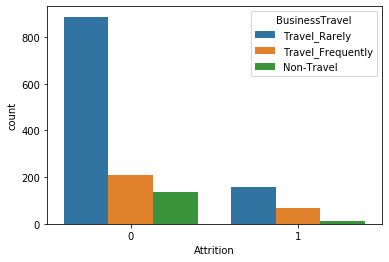

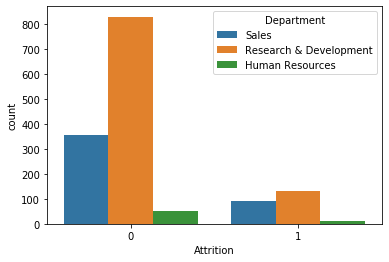

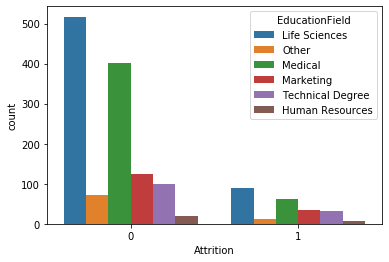

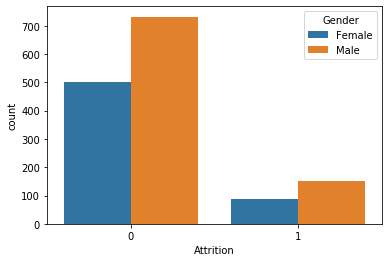

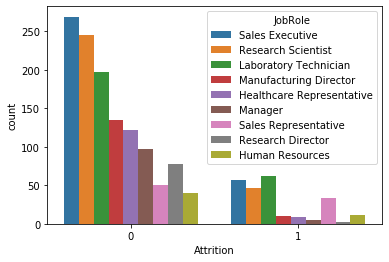

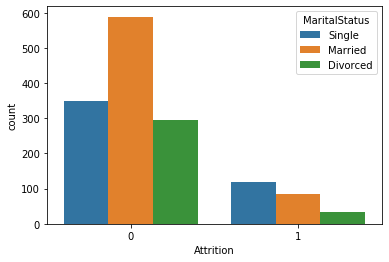

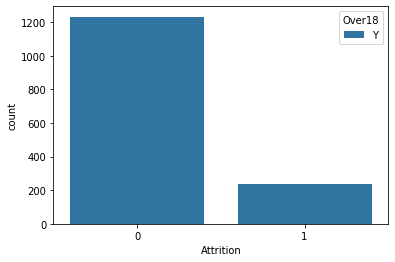

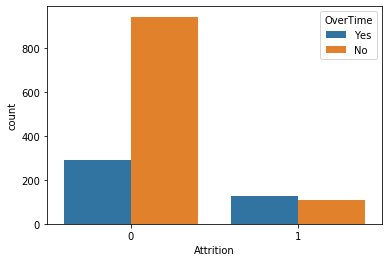

In [5]:
import seaborn as sb
import matplotlib.pyplot as plt

for j in cat:
    sb.countplot(A.Attrition,hue=A[j])
    plt.show()
    

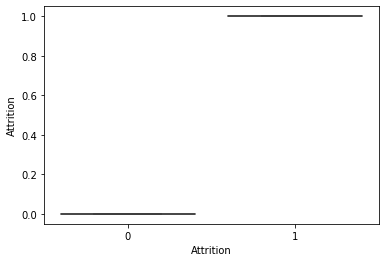

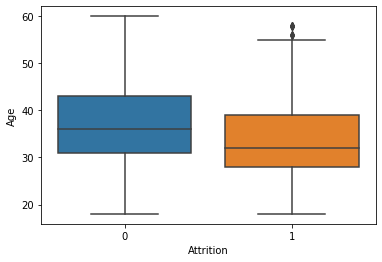

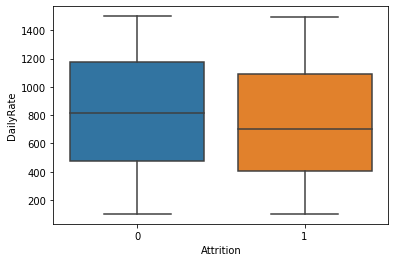

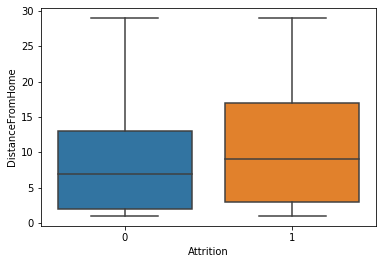

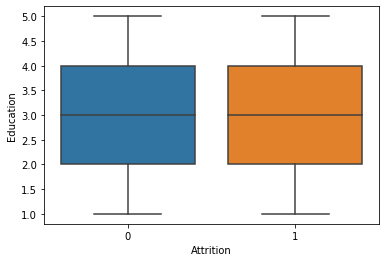

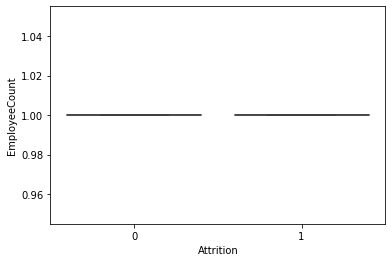

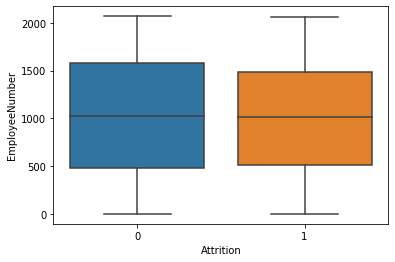

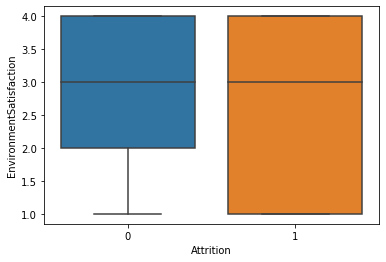

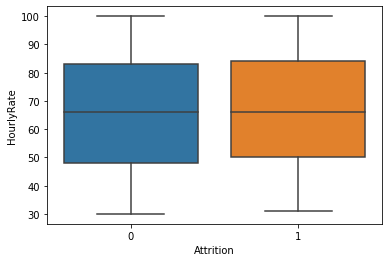

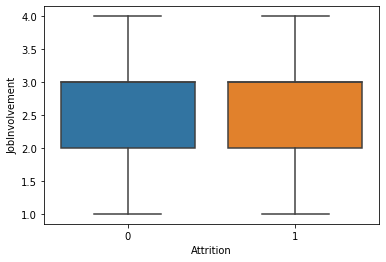

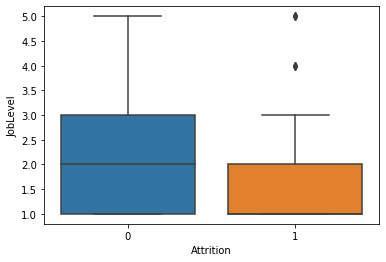

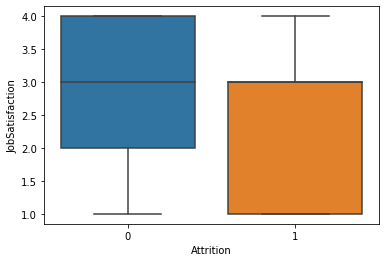

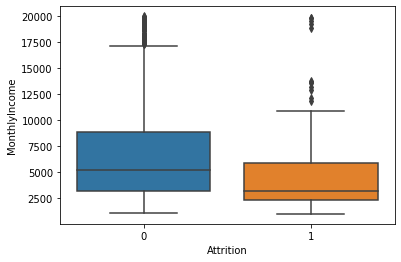

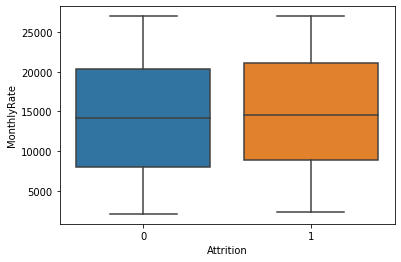

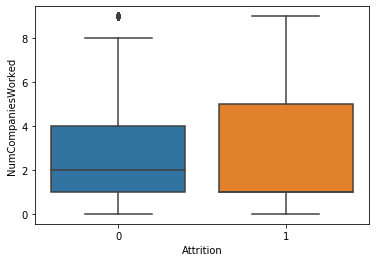

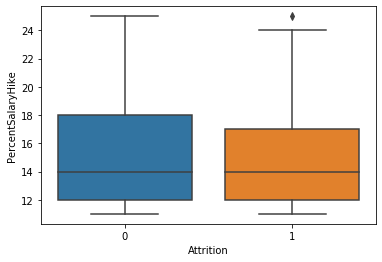

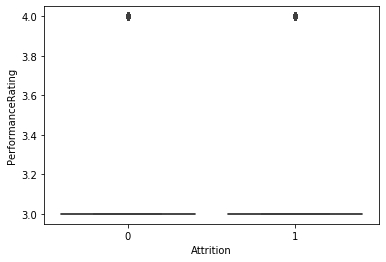

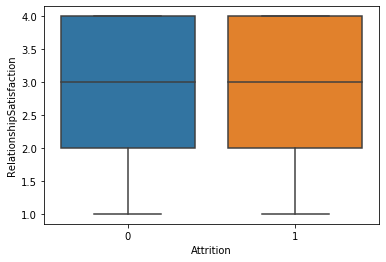

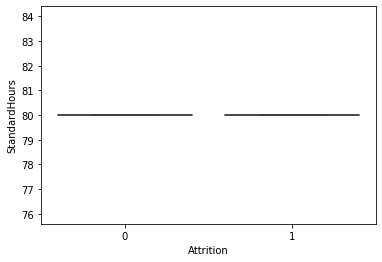

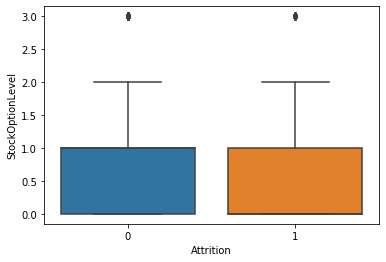

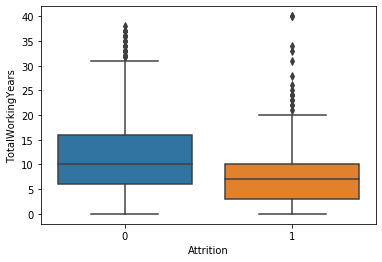

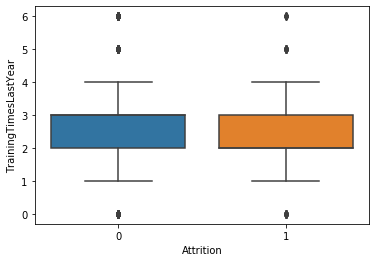

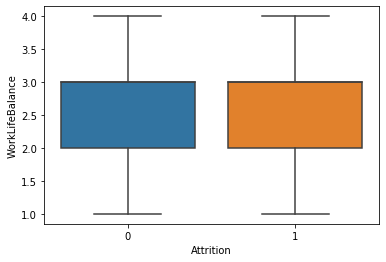

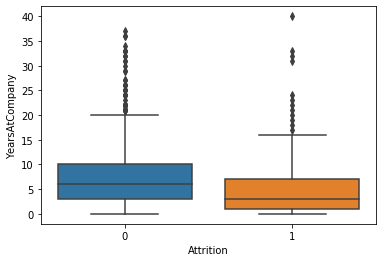

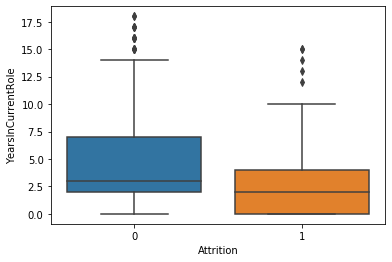

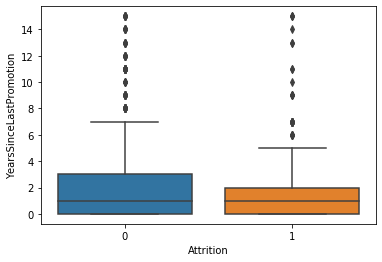

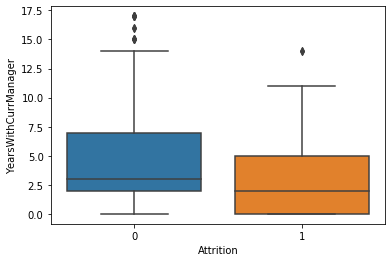

In [6]:
for p in con:
    sb.boxplot(A.Attrition,A[p])
    plt.show()

In [41]:
X=A.drop(labels=["Attrition","EmployeeCount","StandardHours"],axis=1)
Y=A[["Attrition"]]

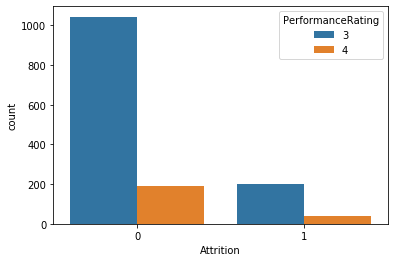

In [42]:
sb.countplot(A.Attrition,hue=A.PerformanceRating)

In [43]:
A.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [45]:
XandY=pd.concat([X,Y],axis=1)

In [46]:
XandY.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition'],
      dtype='object')

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for z in X.columns:
    if(X[z].dtypes=="object"):
        X[z]=le.fit_transform(X[z])
        
#X["BusinessTravel"]=le.fit_transform(A["BusinessTravel"])

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr=LogisticRegression()
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=20)
model=lr.fit(xtrain,ytrain)

pred=model.predict(xtest)

C:\Users\SAMSUNG\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SAMSUNG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [49]:
ytest["prediction"]=pred

C:\Users\SAMSUNG\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

print(accuracy_score(ytest.Attrition,ytest.prediction))
print(precision_score(ytest.Attrition,ytest.prediction))
print(recall_score(ytest.Attrition,ytest.prediction))
print(confusion_matrix(ytest.Attrition,ytest.prediction))

0.8401360544217688
1.0
0.0784313725490196
[[243   0]
 [ 47   4]]


In [51]:
ytest=ytest.drop(labels=["prediction"],axis=1)

In [52]:
XandY=pd.concat([X,Y],axis=1)

In [53]:
XandY.corr()[["Attrition"]]  #[XandY.corr()["Attrition"]<=-0.1 and XandY.corr()["Attrition"]>=0.1]

,Attrition
Age,-0.159205
BusinessTravel,0.000074
DailyRate,-0.056652
Department,0.063991
DistanceFromHome,0.077924
Education,-0.031373
EducationField,0.026846
EmployeeNumber,-0.010577
EnvironmentSatisfaction,-0.103369
Gender,0.029453


In [54]:
X=X.drop(labels=["JobRole","Gender","EducationField","BusinessTravel","Over18"],axis=1)
Y=A[["Attrition"]]


In [55]:
X.head()

,Age,DailyRate,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,2,1,2,1,2,94,3,2,...,3,1,0,8,0,1,6,4,0,5
1,49,279,1,8,1,2,3,61,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,1,2,2,4,4,92,2,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,1,3,4,5,4,56,3,1,...,3,3,0,8,3,3,8,7,3,0
4,27,591,1,2,1,7,1,40,3,1,...,3,4,1,6,3,3,2,2,2,2


In [56]:


lr=LogisticRegression()
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=20)
model=lr.fit(xtrain,ytrain)

pred=model.predict(xtest)

C:\Users\SAMSUNG\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SAMSUNG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
print(accuracy_score(ytest.Attrition,pred))
print(precision_score(ytest.Attrition,pred))
print(recall_score(ytest.Attrition,pred))
print(confusion_matrix(ytest.Attrition,pred))

0.8299319727891157
0.6666666666666666
0.0392156862745098
[[242   1]
 [ 49   2]]


In [58]:
import sklearn.metrics as m

pred_probability=lr.predict_proba(xtest)
pred_probability=pred_probability[:,1]
fpr,tpr,threshold=m.roc_curve(ytest,pred_probability)
auc_roc=m.auc(fpr,tpr)

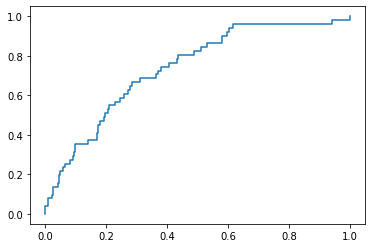

In [59]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,auc_roc)
plt.show()
#plt.plot(auc_roc)